In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader

np.set_printoptions(suppress=True)

dta = sm.datasets.copper.load_pandas().data
dta.index = pd.date_range("1951-01-01", "1975-01-01", freq="AS")
endog = dta["WORLDCONSUMPTION"]

# To the regressors in the dataset, we add a column of ones for an intercept
exog = sm.add_constant(
    dta[["COPPERPRICE", "INCOMEINDEX", "ALUMPRICE", "INVENTORYINDEX"]]
)

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(sm.datasets.copper.DESCRLONG)
print(res.summary())


This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.

                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Fri, 03 Sep 2021   R-squared:                       0.965
Time:                        21:38:34   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC     

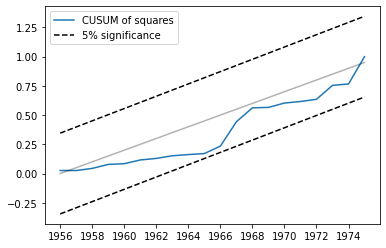

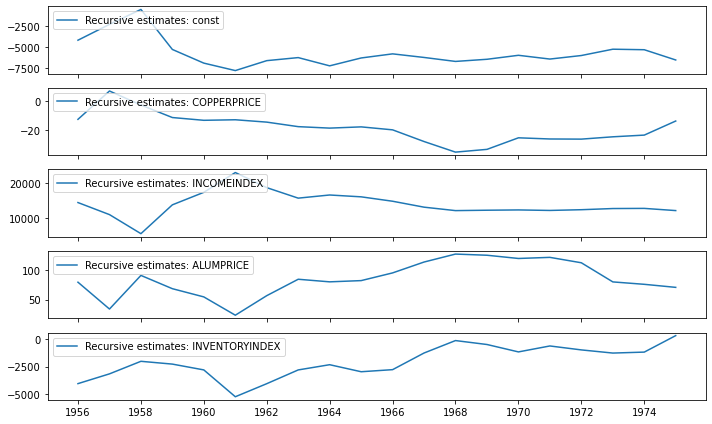

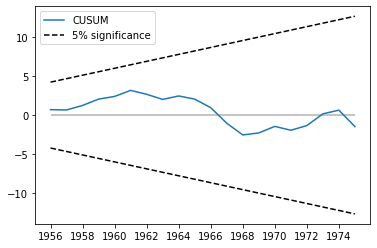

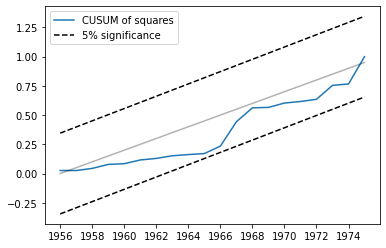

In [4]:
#recursive_coefficients attribute
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10, 6))
#usum statistic
fig = res.plot_cusum()
#cusum_squares attribute
res.plot_cusum_squares()